In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [2]:
# Load the dataset
data = pd.read_csv('../Capstone Project/Data/Train.csv')

Exploratory Data Analysis

In [3]:
# Display the first few rows of the dataset
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
# Disply a summry of the datframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
# Descriptive statistics for numerical features
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
# Frequency of categories in categorical variables
categorical_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for column in categorical_columns:
    print(f'Distribution of {column}:')
    print(data[column].value_counts())
    print('\n')

Distribution of Warehouse_block:
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64


Distribution of Mode_of_Shipment:
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64


Distribution of Product_importance:
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64


Distribution of Gender:
Gender
F    5545
M    5454
Name: count, dtype: int64




In [7]:
# Check the balance of the target variable
print('Target Variable Distribution (Reached on Time):')
print(data['Reached.on.Time_Y.N'].value_counts(normalize=True))

Target Variable Distribution (Reached on Time):
Reached.on.Time_Y.N
1    0.596691
0    0.403309
Name: proportion, dtype: float64


In [9]:
# Compute the correlation matrix
corr = data.select_dtypes(include=['float64', 'int64']).corr()

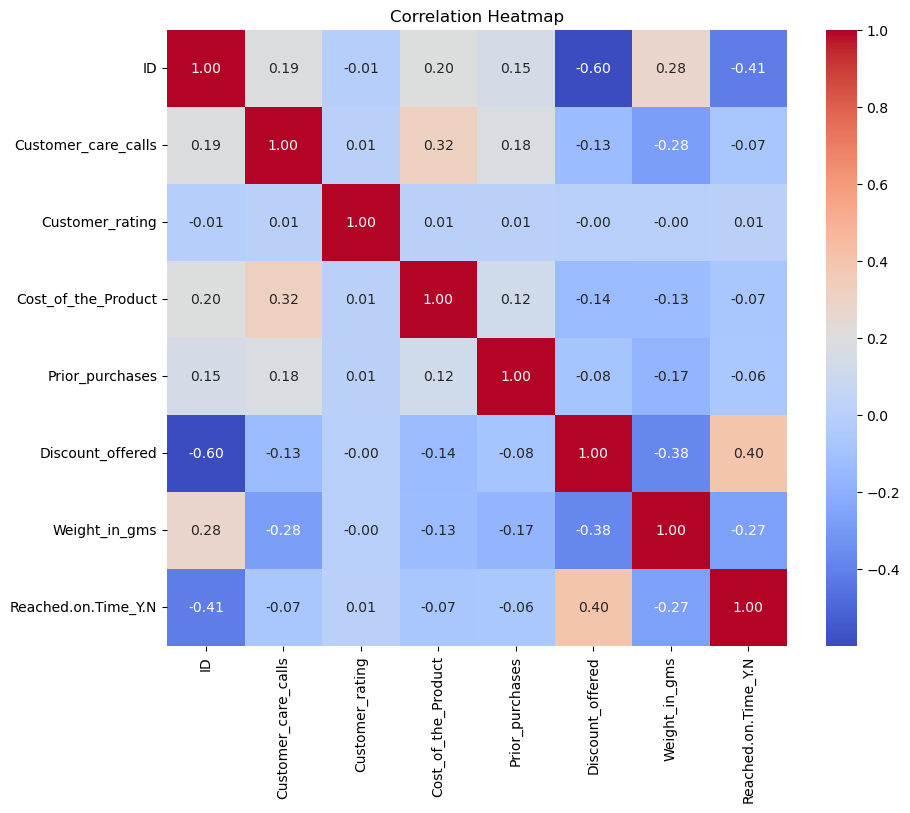

In [10]:
# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Data Pre-processing

In [11]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], drop_first=True)

In [12]:
# Check for missing values
print(data_encoded.isnull().sum())

ID                           0
Customer_care_calls          0
Customer_rating              0
Cost_of_the_Product          0
Prior_purchases              0
Discount_offered             0
Weight_in_gms                0
Reached.on.Time_Y.N          0
Warehouse_block_B            0
Warehouse_block_C            0
Warehouse_block_D            0
Warehouse_block_F            0
Mode_of_Shipment_Road        0
Mode_of_Shipment_Ship        0
Product_importance_low       0
Product_importance_medium    0
Gender_M                     0
dtype: int64


In [14]:
# Identify numerical columns (excluding the target variable)
numerical_cols = data_encoded.select_dtypes(include=['int64', 'float64']).columns.drop('Reached.on.Time_Y.N')

# Scale the numerical features
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

In [15]:
data_encoded.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,-1.731893,-0.047711,-0.700755,-0.690722,-0.372735,1.889983,-1.468240,1,False,False,True,False,False,False,True,False,False
1,-1.731578,-0.047711,1.421578,0.120746,-1.029424,2.815636,-0.333893,1,False,False,False,True,False,False,True,False,True
2,-1.731263,-1.799887,-0.700755,-0.565881,0.283954,2.136824,-0.159002,1,False,False,False,False,False,False,True,False,True
3,-1.730949,-0.923799,0.006689,-0.711529,0.283954,-0.208162,-1.502484,1,True,False,False,False,False,False,False,True,True
4,-1.730634,-1.799887,-0.700755,-0.545074,-0.372735,2.013404,-0.703244,1,False,True,False,False,False,False,False,True,False


Feature Engineering

In [16]:
# Create a new feature: Discount to Cost Ratio
data_encoded['Discount_to_Cost_Ratio'] = data_encoded['Discount_offered'] / data_encoded['Cost_of_the_Product']

Preparing for Model Building

In [18]:
# Define the feature matrix (X) and the target variable (y)
X = data_encoded.drop('Reached.on.Time_Y.N', axis=1)
y = data_encoded['Reached.on.Time_Y.N']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building

Training 3 types of models:

Logistic Regression

Decision Tree Classifier

Random Forest Classifier

In [20]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions)
logistic_recall = recall_score(y_test, logistic_predictions)
logistic_auc = roc_auc_score(y_test, logistic_predictions)

print(f"Logistic Regression Accuracy: {logistic_accuracy}")
print(f"Precision: {logistic_precision}")
print(f"Recall: {logistic_recall}")
print(f"AUC-ROC: {logistic_auc}")

Logistic Regression Accuracy: 0.6518181818181819
Precision: 0.7130434782608696
Recall: 0.6911877394636016
AUC-ROC: 0.6428005736424154


In [22]:
# Initialize and train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
tree_predictions = tree_model.predict(X_test)

# Evaluate the model
tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_precision = precision_score(y_test, tree_predictions)
tree_recall = recall_score(y_test, tree_predictions)
tree_auc = roc_auc_score(y_test, tree_predictions)

print(f"Decision Tree Accuracy: {tree_accuracy}")
print(f"Precision: {tree_precision}")
print(f"Recall: {tree_recall}")
print(f"AUC-ROC: {tree_auc}")

Decision Tree Accuracy: 0.65
Precision: 0.7031131359149583
Recall: 0.7095785440613027
AUC-ROC: 0.6363535178407073


In [23]:
# Initialize and train the Random Forest model
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions on the test set
forest_predictions = forest_model.predict(X_test)

# Evaluate the model
forest_accuracy = accuracy_score(y_test, forest_predictions)
forest_precision = precision_score(y_test, forest_predictions)
forest_recall = recall_score(y_test, forest_predictions)
forest_auc = roc_auc_score(y_test, forest_predictions)

print(f"Random Forest Accuracy: {forest_accuracy}")
print(f"Precision: {forest_precision}")
print(f"Recall: {forest_recall}")
print(f"AUC-ROC: {forest_auc}")

Random Forest Accuracy: 0.6704545454545454
Precision: 0.7882703777335984
Recall: 0.6076628352490422
AUC-ROC: 0.6848370042166999


Two more advanced models:

GBM

XGBoost

In [28]:
# Initialize and train the GBM model
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

# Make predictions on the test set
gbm_predictions = gbm_model.predict(X_test)

# Evaluate the model
gbm_accuracy = accuracy_score(y_test, gbm_predictions)
gbm_precision = precision_score(y_test, gbm_predictions)
gbm_recall = recall_score(y_test, gbm_predictions)
gbm_auc = roc_auc_score(y_test, gbm_predictions)

print(f"GBM Accuracy: {gbm_accuracy}")
print(f"Precision: {gbm_precision}")
print(f"Recall: {gbm_recall}")
print(f"AUC-ROC: {gbm_auc}")

GBM Accuracy: 0.6904545454545454
Precision: 0.8959390862944162
Recall: 0.5409961685823754
AUC-ROC: 0.7246880284252659


In [29]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_auc = roc_auc_score(y_test, xgb_predictions)

print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"AUC-ROC: {xgb_auc}")

c:\Users\kgood\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.6468181818181818
Precision: 0.7237288135593221
Recall: 0.6544061302681993
AUC-ROC: 0.6450801601061666


Hyperparameter Tuning

In [25]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.6799640808310506
